## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

pal = sns.color_palette()
from subprocess import check_output
from wordcloud import WordCloud
from collections import Counter
from matplotlib import rcParams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import wordcloud
import string

## importing the file

In [2]:
df = pd.read_csv('E://study//durham//sem1//AI Algorithm//AI alog project//Data Acquisition & Understanding//spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data cleaning and renaming the fields

In [3]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"sms_text"})
df.head()

,label,sms_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Performing the EDA
## 1. Character Count

In [4]:
df.describe()

,label,sms_text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   sms_text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.groupby('label').describe().T

label                               ham  \
sms_text count                     4825   
         unique                    4516   
         top     Sorry, I'll call later   
         freq                        30   

label                                                         spam  
sms_text count                                                 747  
         unique                                                653  
         top     Please call our customer service representativ...  
         freq                                                    4

In [7]:
df['length']=df['sms_text'].apply(len)

In [8]:
df.head()

,label,sms_text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

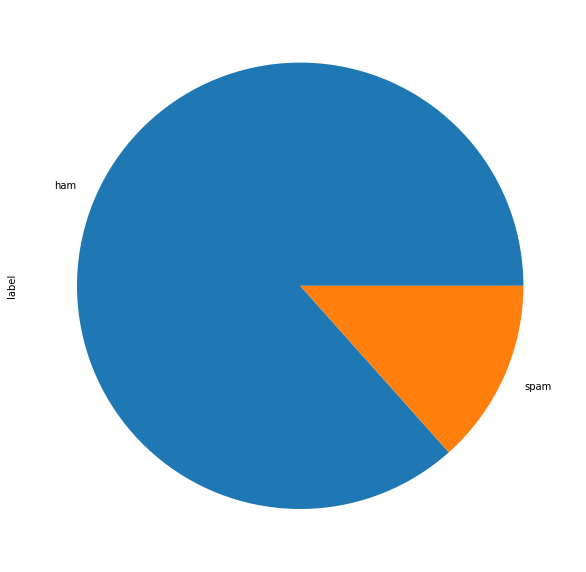

In [10]:
rcParams["figure.figsize"] = 10,15
df["label"].value_counts().plot(kind="pie")

In [11]:
messages = pd.Series(df['sms_text'].tolist()).astype(str)
ham_messages = pd.Series(df[df['label'] == 'ham']['sms_text'].tolist()).astype(str)
spam_messages = pd.Series(df[df['label'] == 'spam']['sms_text'].tolist()).astype(str)
dist_all = messages.apply(len)
dist_ham = ham_messages.apply(len)
dist_spam = spam_messages.apply(len)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


# Summary statistics for character count of all messages
mean-all 80.12 
std-all 59.69 
min-all 2.00 
max-all 910.00


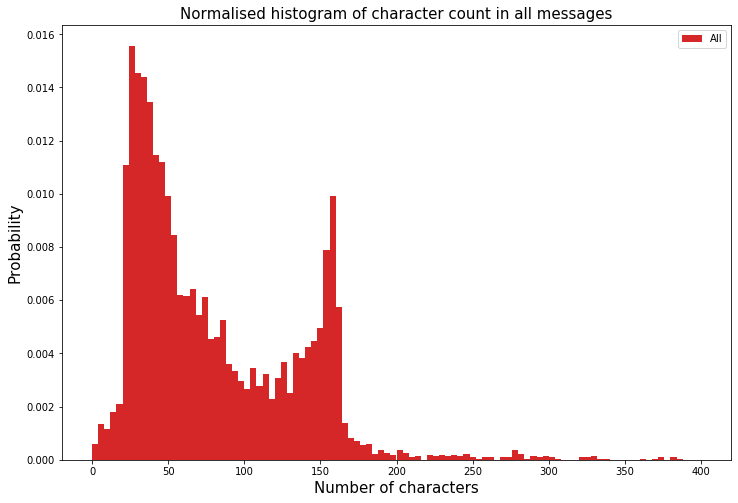

In [12]:
plt.figure(figsize=(12, 8))
plt.hist(dist_all, bins=100, range=[0,400], color=pal[3], normed=True, label='All')
plt.title('Normalised histogram of character count in all messages', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('# Summary statistics for character count of all messages')
print('mean-all {:.2f} \nstd-all {:.2f} \nmin-all {:.2f} \nmax-all {:.2f}'.format(dist_all.mean(), dist_all.std(), dist_all.min(), dist_all.max()))

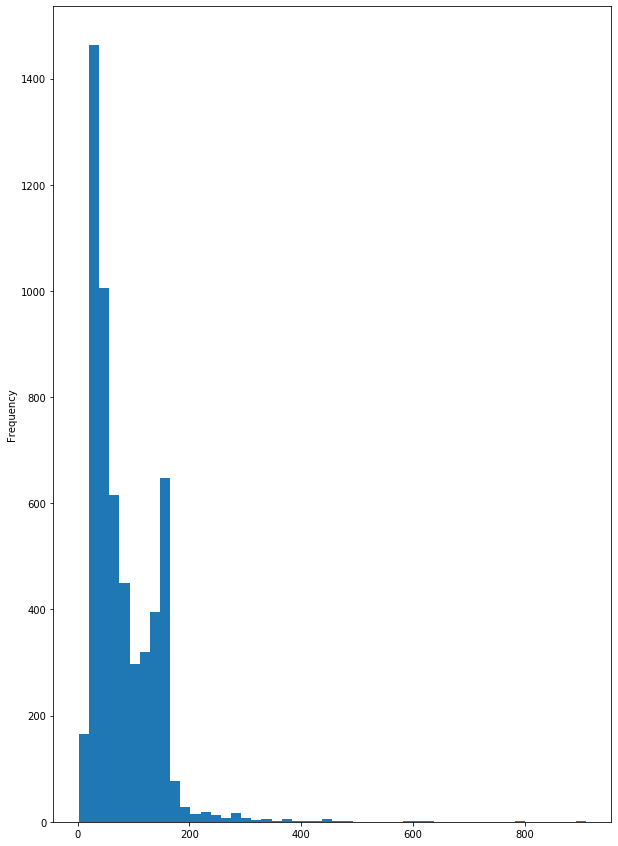

In [13]:
df['length'].plot(bins=50,kind='hist')
plt.ioff()

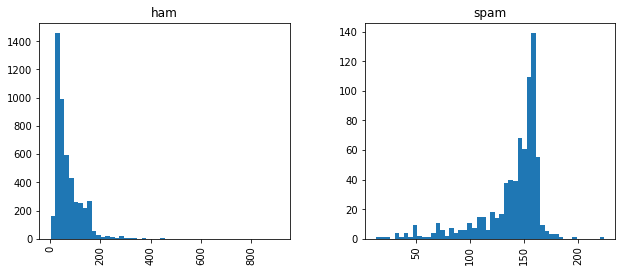

In [14]:
df.hist(column='length',by='label',bins=50,figsize=(10,4))
plt.ioff()

## Spam message has longer than normal message

In [15]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

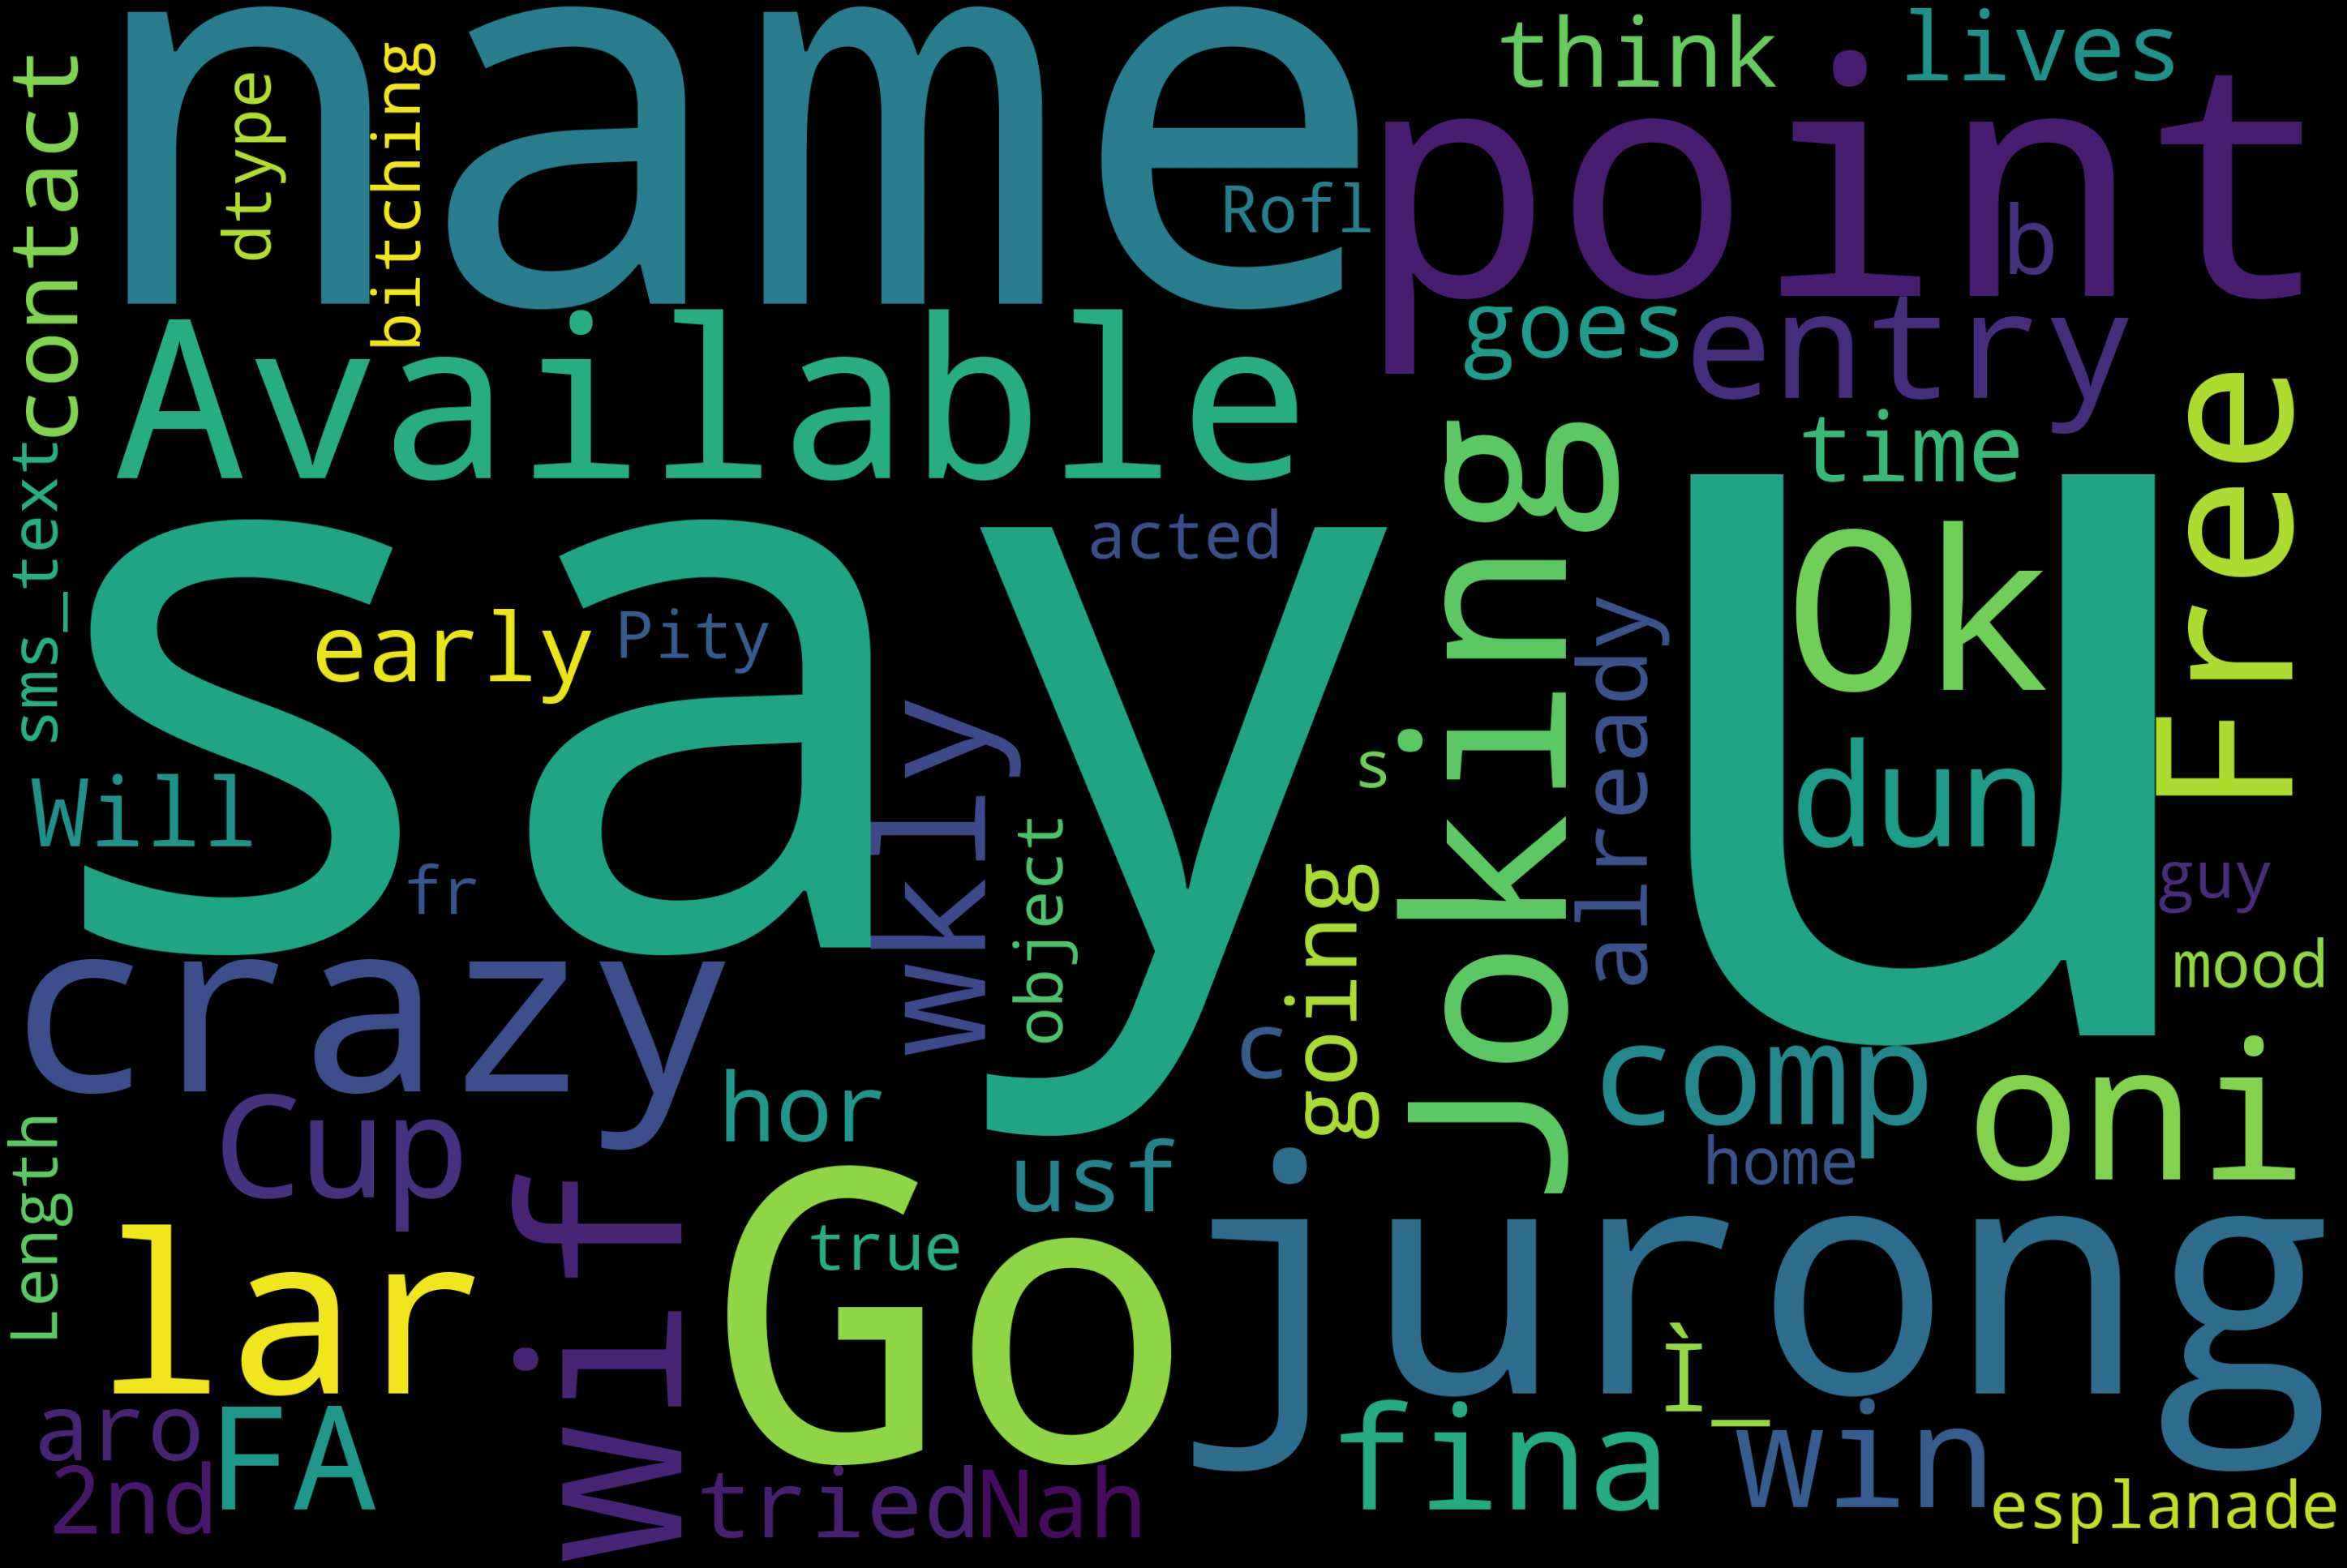

In [16]:
real_data_text = df.sms_text
generate_word_cloud(real_data_text)

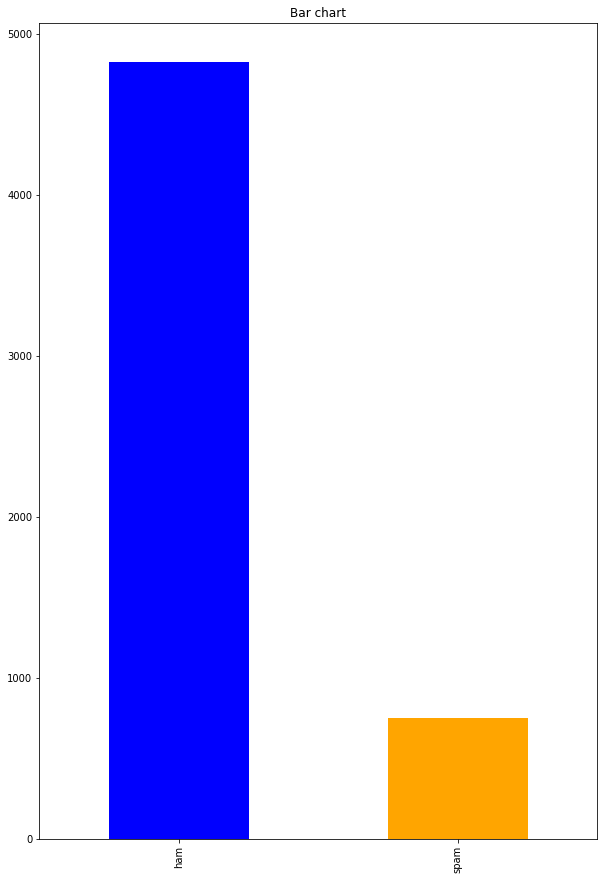

In [17]:
count_Class=pd.value_counts(df["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [18]:
df['spam'] = df['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(15)

,label,sms_text,length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,1
6,ham,Even my brother is not like to speak with me. ...,77,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,0
8,spam,WINNER!! As a valued network customer you have...,158,1
9,spam,Had your mobile 11 months or more? U R entitle...,154,1


In [19]:
data_ham  = df[df['spam'] == 0].copy()
data_spam = df[df['spam'] == 1].copy()

In [20]:
df.head()

,label,sms_text,length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [21]:
df.iloc[0][1]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## Finding out common words in HAM n SPAM messages

In [22]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['sms_text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

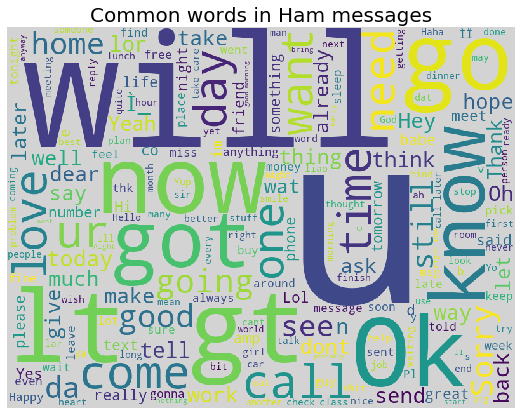

In [23]:
show_wordcloud(data_ham, "Common words in Ham messages")

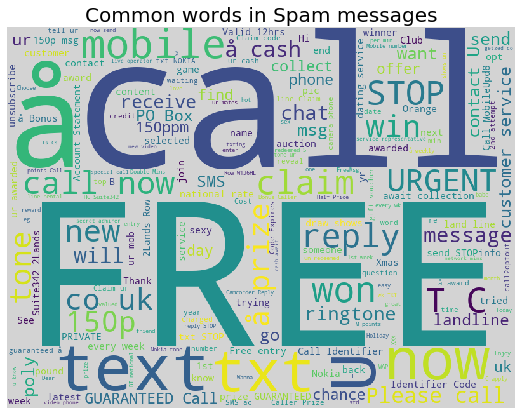

In [24]:
show_wordcloud(data_spam, "Common words in Spam messages")

## Performing ML Algo

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [26]:
df.head()

,label,sms_text,length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [27]:
X = df['sms_text']
y = df['label']

In [28]:
cv = CountVectorizer()
X = cv.fit_transform(X) 

In [29]:
## counting the occurrences of tokens in each document.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9793365959760739

In [32]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1587
        spam       0.93      0.92      0.92       252

    accuracy                           0.98      1839
   macro avg       0.96      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839

